# Energy spectrum  of HPGe Am241, Co60 and Cs137

Now, Let's test the Bayesian Blocks algorithm with an energy spectrum dataset collected using a High-Purity Germanium (HPGe) detector. The dataset, stored in a .dat file, combines sources of Americium-241 (Am241), Cobalt-60 (Co60), and Cesium-137 (Cs137). The sources were sealed, allowing only photons to escape and be detected, as the alpha particles were absorbed by the sealing.

Length dataset: 8192 


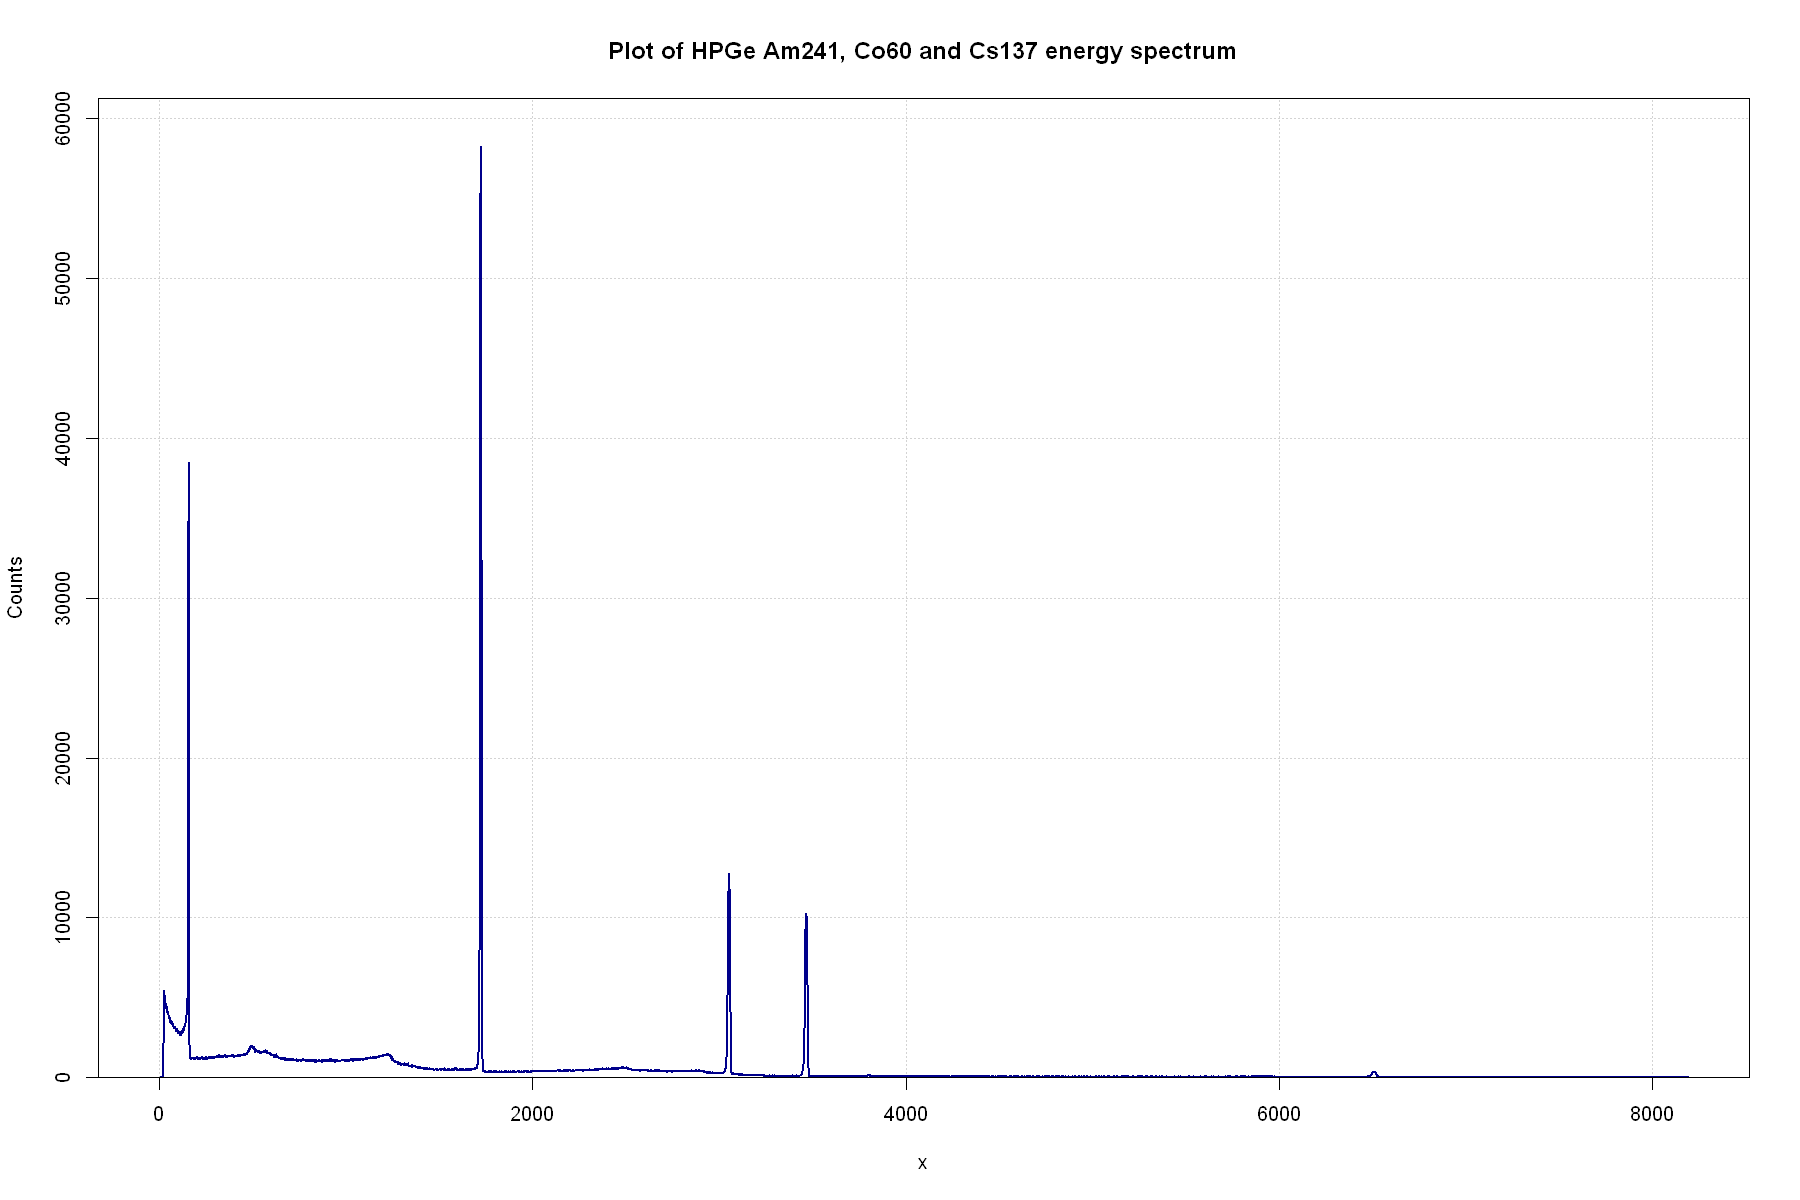

In [1]:
# Load data file and create a dataframe
filename <- "data/B19036_AmCsCo_20180316.dat"
data <- read.table(filename, header=FALSE, sep='\n', skip=2, col.names='y')
dim <- nrow(data)

# Add x column, representing the index of each data point
data['x'] <- 0:(dim-1)

cat('Length dataset:', dim, '\n')

# Set the size of the plots
options(repr.plot.width=15, repr.plot.height=10)

#Plot setting
plot(data$x, data$y, xaxs='r', yaxs='i', col='darkblue', type='l', panel.first=grid(),
     ylim=c(0, max(data$y) + 3000), main="Plot of HPGe Am241, Co60 and Cs137 energy spectrum", 
     lty=1, lwd=2, xlab='x', ylab='Counts')


The dataset then is rearranged to create a histogram by repeating the value *x* as many times as the count in *y*.  
This process creates a new dataset *new_data* with a length corresponding to the total sum of counts in *y*.

In [2]:
# Rearrange dataset
new_data <- numeric(sum(data$y))

k <- 1
for (i in 1:dim) {
  l <- data$y[i]
  if (l != 0) {
    new_data[k:(k+l-1)] <- rep(data$x[i], l)
    k <- k + l 
  }
}

cat('Length new dataset:', length(new_data), '\n')


Length new dataset: 3909541 


Warning message in plot.window(xlim, ylim, "", ...):
"parametro grafico "panel.first" non valido"
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
"parametro grafico "panel.first" non valido"
Warning message in axis(1, ...):
"parametro grafico "panel.first" non valido"
Warning message in axis(2, at = yt, ...):
"parametro grafico "panel.first" non valido"


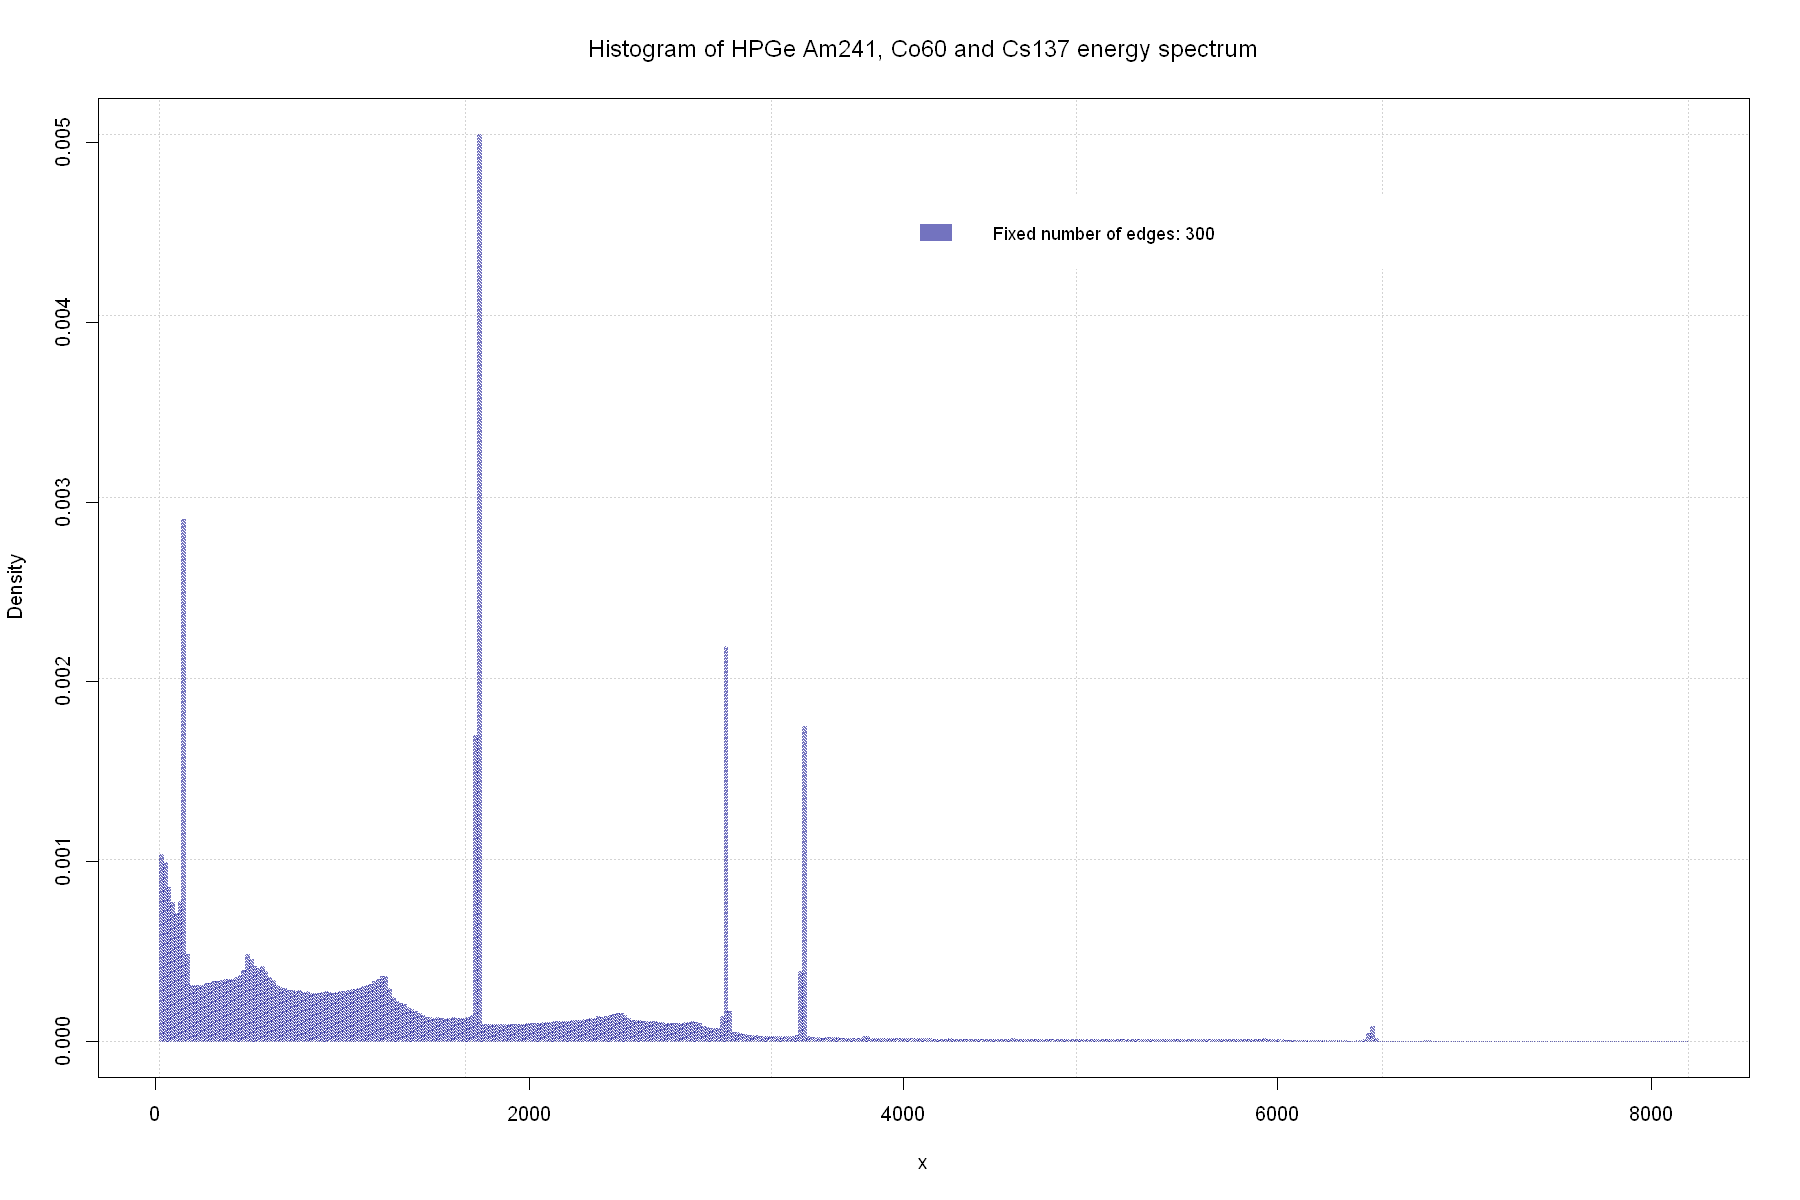

In [3]:
# Load necessary packages
library(latex2exp)

# Set the size of the plots
options(repr.plot.width=15, repr.plot.height=10)

breaks <- 300
hist(new_data, breaks=breaks, freq=FALSE, col=scales::alpha('darkblue', .55), border=FALSE, 
     panel.first=grid(), density=200, xlab='x', ylab='Density', 
     main=TeX(sprintf("Histogram of HPGe Am241, Co60 and Cs137 energy spectrum")))
legend("topright", inset=0.1, legend=c(sprintf("Fixed number of edges: %3i", breaks)),
       fill=c(scales::alpha('darkblue', .55)), cex=0.9, box.lty=0, border=FALSE)
box()

The Bayesian Blocks algorithm is applied to the data to identify significant features in the spectrum.

Two histograms are plotted: one with a fixed number of breaks (200) and the other with breaks determined by the Bayesian Blocks algorithm.

The histograms are displayed with logarithmic scaling on the y-axis for better visualization.

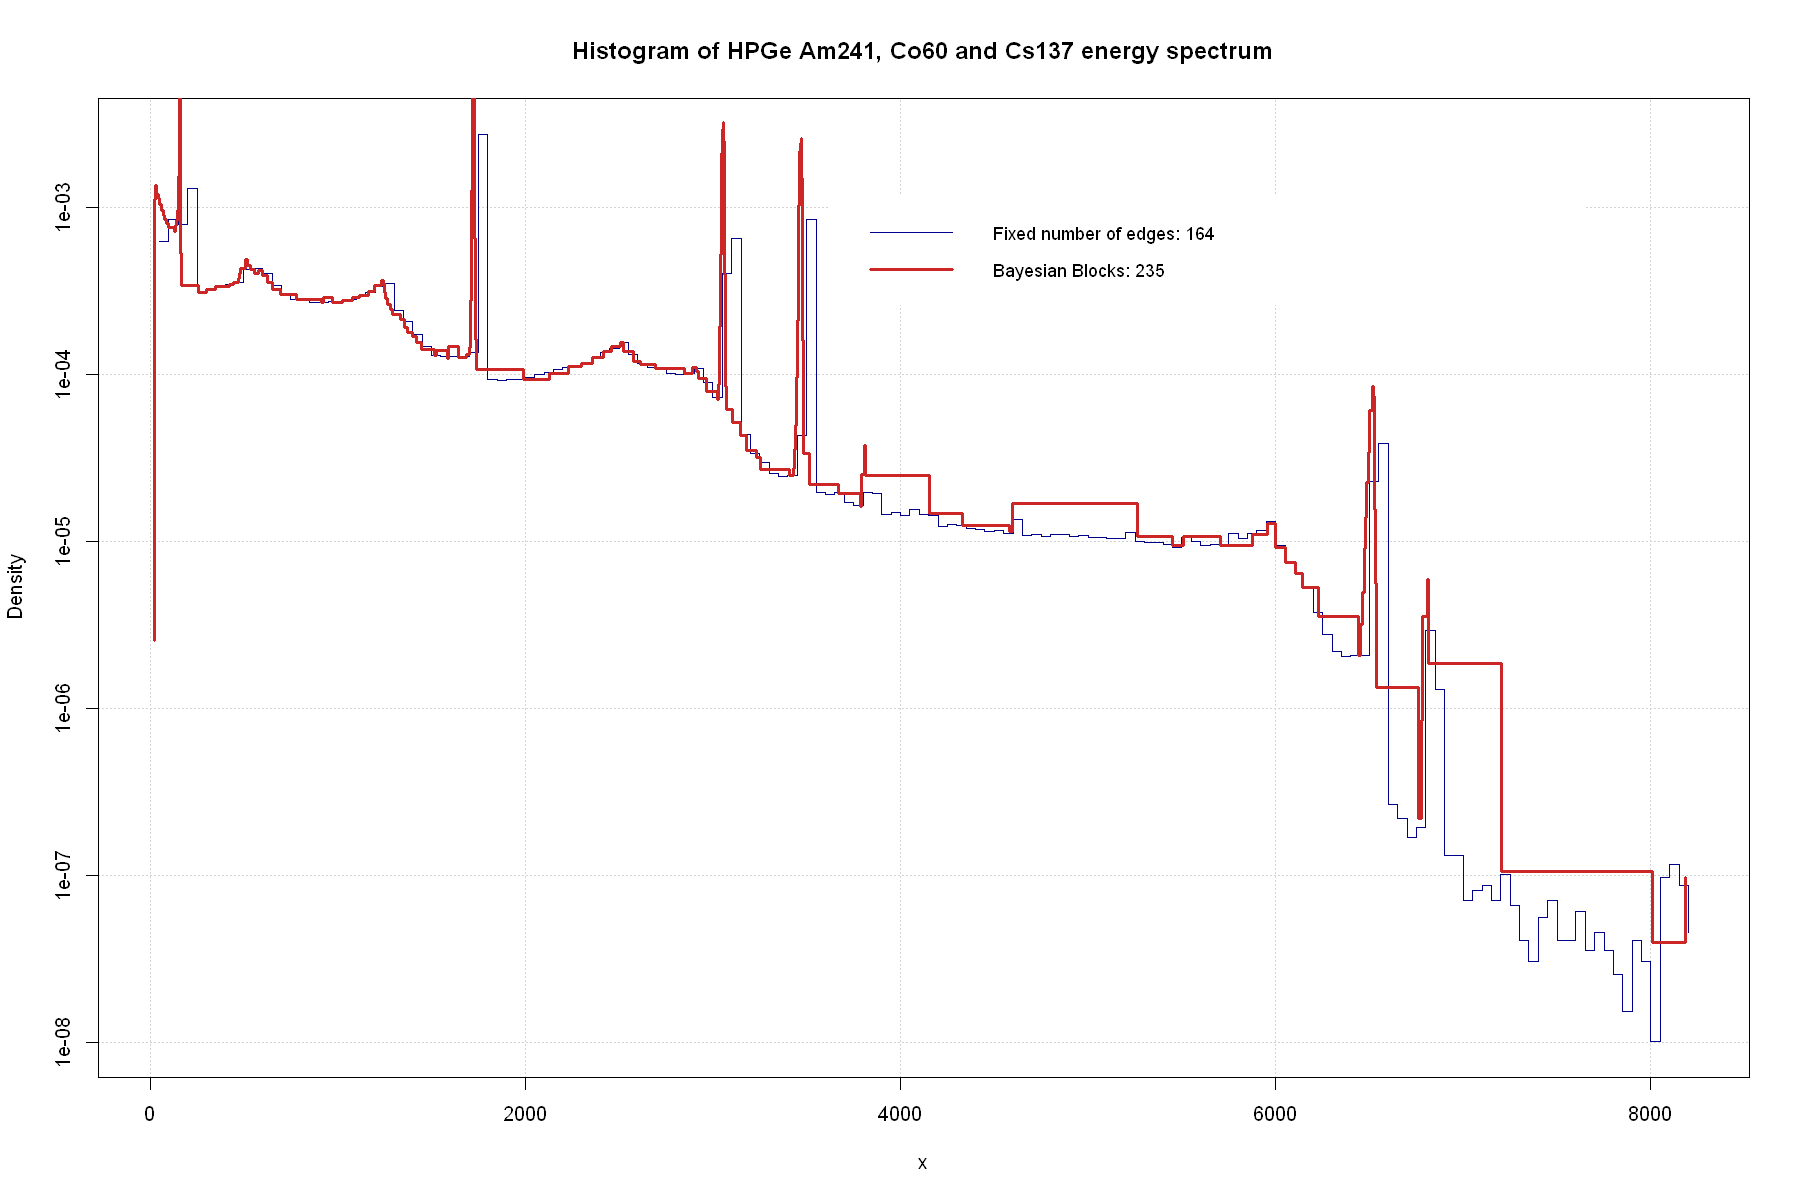

In [7]:
# Load the Bayesian Blocks function from the provided file
source('script/func_bb.R')

h1 <- hist(new_data, breaks=200, plot=FALSE)
h2 <- hist(new_data, breaks=bayesian_blocks(new_data, gamma = 0.001), plot=FALSE)

num_bayesian_blocks <- length(h2$breaks) - 1

options(repr.plot.width=15, repr.plot.height=10)

# Plot with fixed breaks
plot(x=h1$breaks[-1], y=h1$density, log="y", panel.first=grid(),
     col='darkblue', lwd=1.5, type='s', xlab='x', ylab='Density',
     main="Histogram of HPGe Am241, Co60 and Cs137 energy spectrum")
# Bayesian Blocks
lines(x=h2$breaks[-1], y=h2$density, type='s', lwd=3, col='firebrick3')

legend("topright", inset=0.1, legend=c(sprintf("Fixed number of edges: %3i", length(h1$breaks)-1), 
                                       sprintf("Bayesian Blocks: %3i", num_bayesian_blocks)),
       col=c("darkblue", "firebrick3"), lty=1, lwd=c(1.5, 3), cex=0.9, box.lty=0, border=FALSE)


- Peak identification:
   - The Bayesian Blocks algorithm highlights the main peaks in the energy spectrum. These peaks correspond to the energy levels of the radioactive isotopes (Am241, Co60, and Cs137).
   - The ability to identify and separate these peaks is crucial for analyzing the presence and quantities of different isotopes.
- Data Handling Efficiency:
   - The rearrangement of the dataset into *new_data* increases the dataset size significantly. This step is necessary for the histogram but could be computationally intensive.
   - Efficient handling of such large datasets is important, especially in high-resolution spectroscopy.
- Algorithm Robustness:
   - The Bayesian Blocks algorithm's robustness is demonstrated by its ability to identify peaks regardless of the exact prior parameter values.
   - This robustness makes the algorithm suitable for various datasets with different statistical properties.

# Energy Spectrum of Eu152

Length of dataset: 702247 


null device 
          1

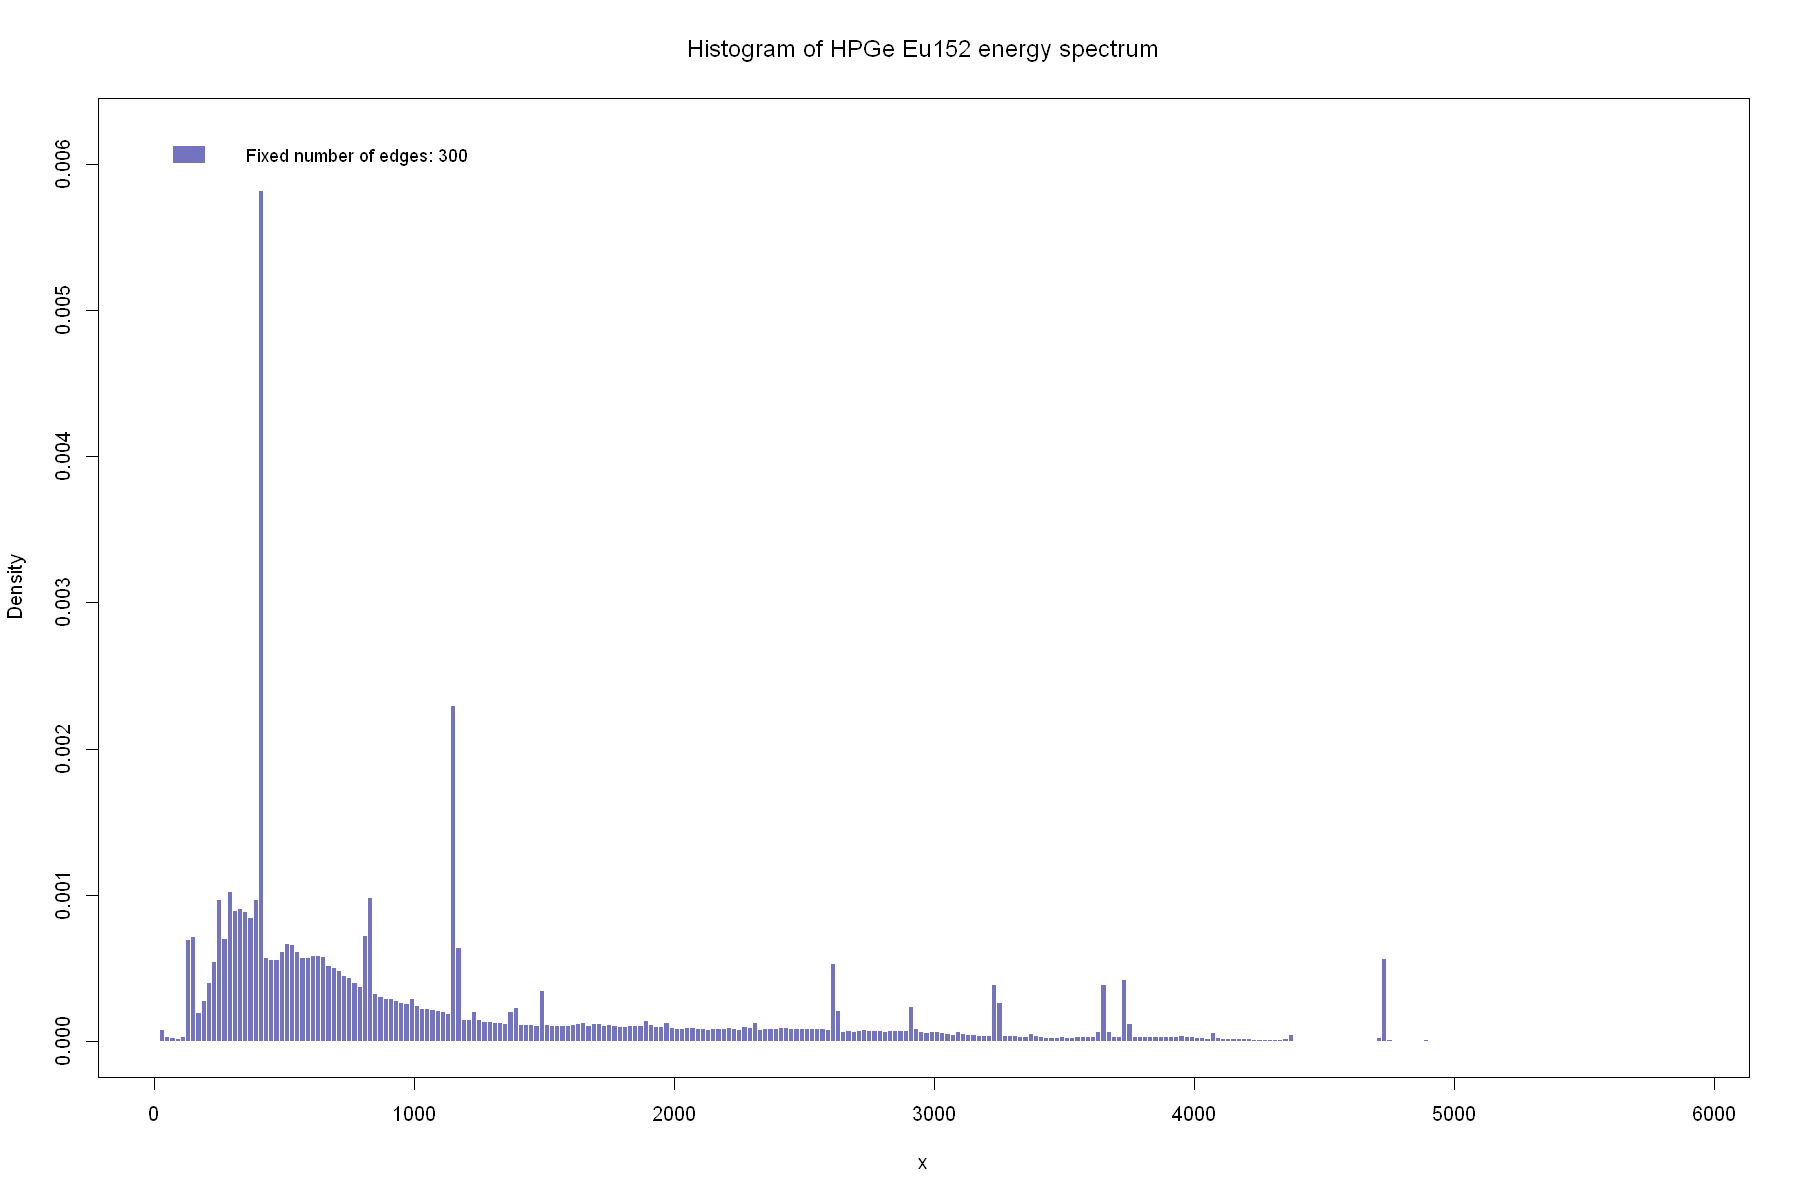

In [8]:
# Load data file and create a dataframe
filename <- "data/data_Eu152_HPGe.txt"
data <- read.table(filename, header=FALSE, sep='\n', skip=2, col.names='y')
dim <- nrow(data)

# Display the length of the dataset
cat('Length of dataset:', dim, '\n')


# Set the size of the plot
options(repr.plot.width=15, repr.plot.height=10)

# Define number of breaks for the histogram
breaks <- 300
# Save the initial histogram plot
hist(data$y, breaks=breaks, freq=FALSE, col=scales::alpha('darkblue', .55), border=FALSE, 
     xlab='x', ylab='Density', main=TeX(sprintf("Histogram of HPGe Eu152 energy spectrum")))
legend("topleft", inset=0.02, legend=c(sprintf("Fixed number of edges: %3i", breaks)),
       fill=c(scales::alpha('darkblue', .55)), cex=0.9, box.lty=0, border=FALSE)
box()
dev.off()

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"omesso valore 1 y <= 0 dal grafico su scala logaritmica"


null device 
          1

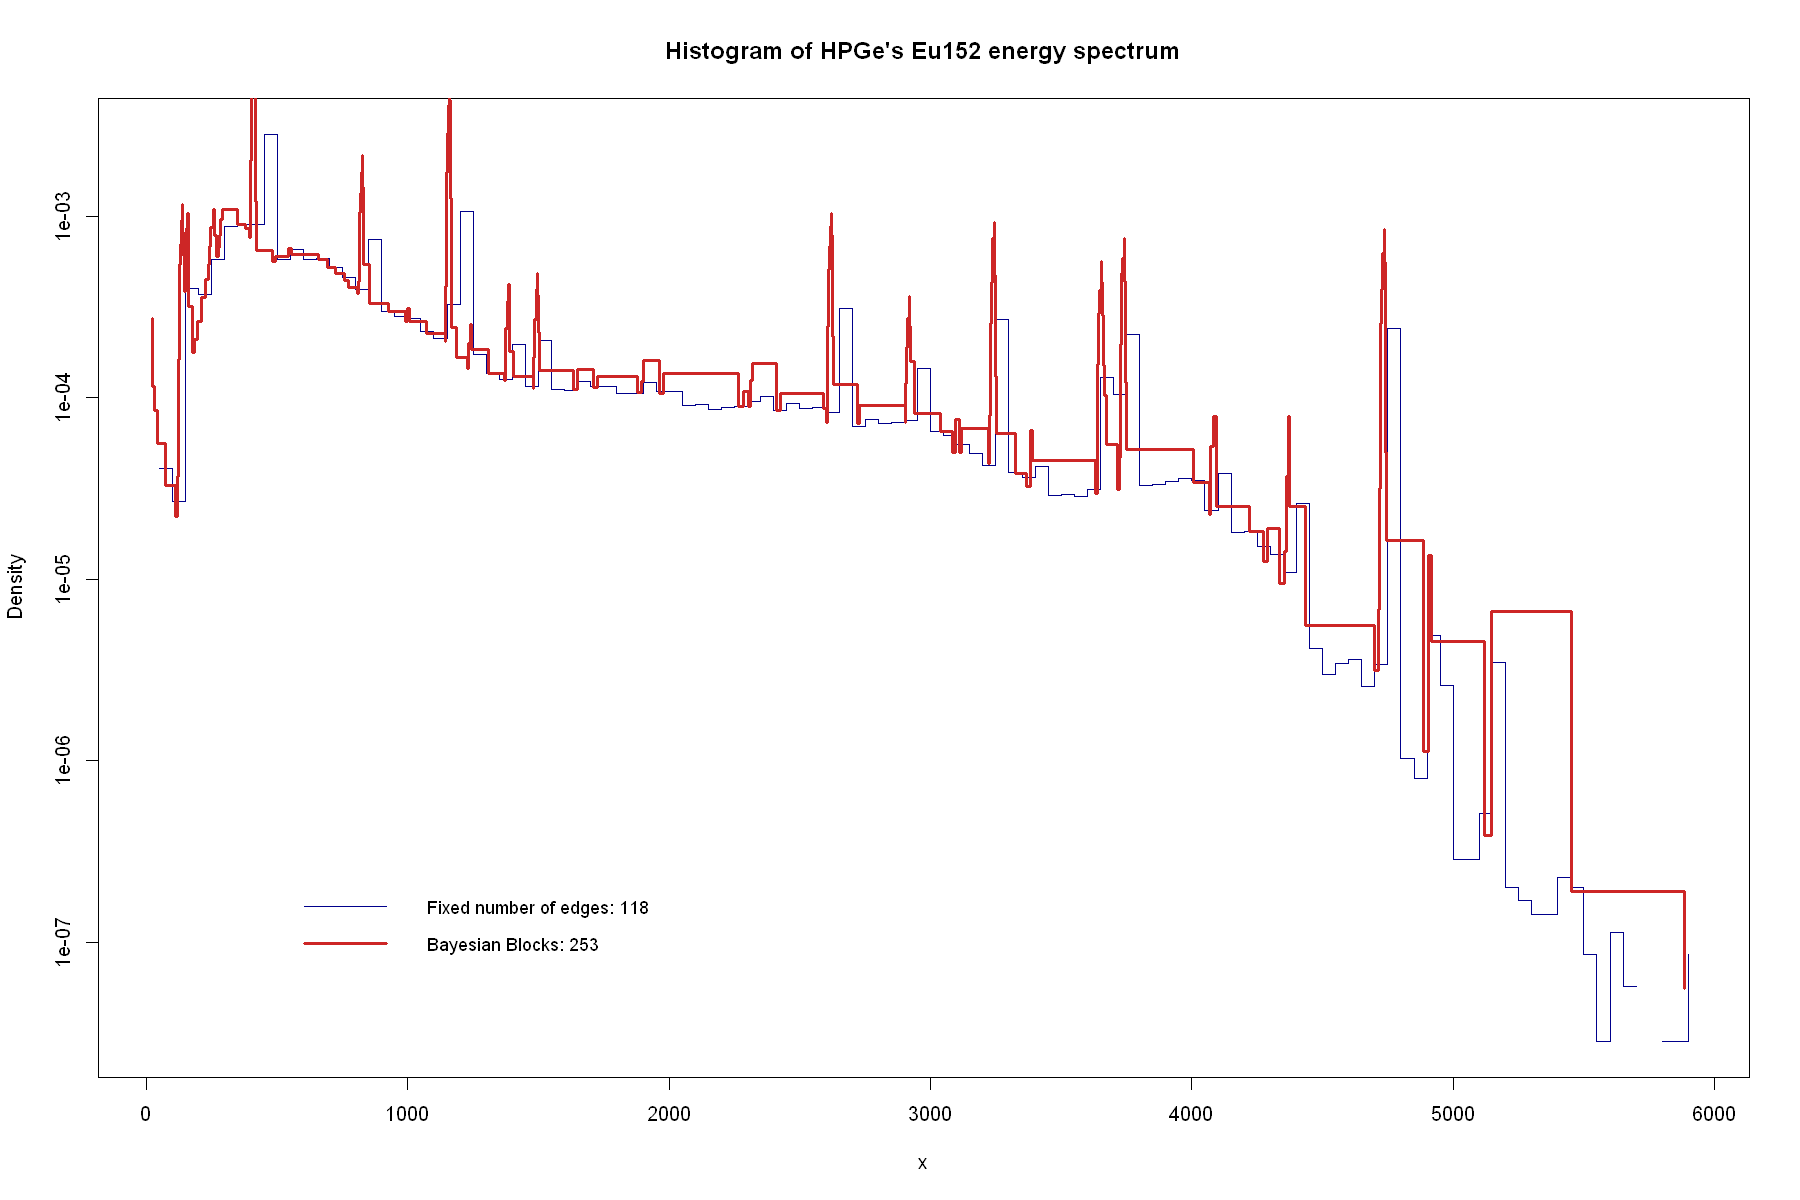

In [9]:

# Use the Bayesian Blocks function 
breaks_bayesian <- bayesian_blocks(data$y, gamma=0.001)
num_bayesian_blocks <- length(breaks_bayesian) - 1  # Number of Bayesian Blocks

# Generate histograms with fixed breaks
h1 <- hist(data$y, breaks=200, plot=FALSE)
h2 <- hist(data$y, breaks=breaks_bayesian, plot=FALSE)

# Save the plot with fixed breaks and Bayesian Blocks combined
plot(x=h1$breaks[-1], y=h1$density, log='y', col='darkblue', lwd=1.5, type='s', xlab='x', ylab='Density',
     main="Histogram of HPGe's Eu152 energy spectrum")
lines(x=h2$breaks[-1], y=h2$density, type='s', lwd=3, col='firebrick3')
legend("bottomleft", inset=0.1, legend=c(sprintf("Fixed number of edges: %3i", length(h1$breaks)-1), 
                                         sprintf("Bayesian Blocks: %3i", num_bayesian_blocks)),
       col=c("darkblue", "firebrick3"), lty=1, lwd=c(1.5, 3), cex=0.9, box.lty=0, border=FALSE)
dev.off()


We note that, in this case, the Bayesian Blocks algorithm does not recognize any spikes for any implemented prior (indicating that the prior does not influence the number or position of change points). This result is a poor representation of the Europium-152 (Eu152) spectrum. The issue may stem from the large number of spikes in the plot, which are numerous and not easily distinguishable from the background. It is important to remember that a lower signal-to-noise ratio can significantly affect the performance of the Bayesian Blocks algorithm. Additionally, although the peaks are very tight, this should not pose a problem, as previous examples have shown the algorithm's capability to recognize tight spikes.